In [1]:
#Load the csv file into a numpy data matrix
import numpy as np
import matplotlib.pyplot as plt
import sys
import csv

data = [] # Create empty data matrix

#Load csv file into data --- 
with open('digitData.csv') as csvfile: 
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if len(row) != 0:
            data = data + [row]
#---

data =  np.asarray(data) #Convert the regular array to numpy array
print(data)
print("done")

[['label' 'pixel0' 'pixel1' ..., 'pixel781' 'pixel782' 'pixel783']
 ['1' '0' '0' ..., '0' '0' '0']
 ['0' '0' '0' ..., '0' '0' '0']
 ..., 
 ['7' '0' '0' ..., '0' '0' '0']
 ['6' '0' '0' ..., '0' '0' '0']
 ['9' '0' '0' ..., '0' '0' '0']]
done


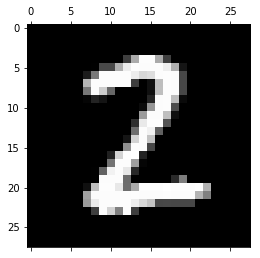

In [2]:
#Visualize original digits 
displayPixelValues = data[23][1:]  #Gather all pixel values from first data point

displayPixelValues = np.reshape(displayPixelValues, (-1, 28)) #Reshape data to 28 by 28 array instead of 784 by 1 array
displayPixelValues = displayPixelValues.astype(np.int) #Convert the data into integers from strings
#print(displayPixelValues) #Print out array of single digit

plt.matshow(displayPixelValues, fignum=10,cmap=plt.cm.gray) #Make grayscale representation of digit
plt.show() #Show grayscale representation of digit



In [3]:
#Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
np.random.seed(2) 

layer0_neurons = 784 #Number of pixels = 784
layer1_neurons = 270 #Number of middle layer neurons. I picked 30 for now
layer2_neurons = 10 #Output neurons here. 
                    #The activation of the output neurons are the "guesses"
#Initialize random weights and biases

layer1_b = np.zeros((layer1_neurons,1))#Initialize layer_1 biases to 0. This is a 30 by 1 matrix
layer1_w = (2*np.random.random((layer1_neurons,layer0_neurons)) - 1) / 100 #Initialize layer_1 weights to a value between -.01 and .01 This is a 30 by 784 matrix
layer2_b = np.zeros((layer2_neurons,1)) #Initialize layer_2 biases to 0. This is a 10 by 1 matrix
layer2_w = (2*np.random.random((layer2_neurons,layer1_neurons)) - 1) / 100 #Initialize layer_2 weights to to a value between -.01 and .01 This is a 10 by 30 matrix

In [5]:
#Function evaluates accuracy given predictions, targets, weights, and biases
def evaluateNetworkAccuracy(x,y,w1,b1,w2,b2):
    z_1 = np.dot(w1,x)+b1
    a_1 = sigmoid(z_1)

    z_2 = np.dot(w2,a_1)+b2
    a_2 = sigmoid(z_2)

    predictions = np.argmax(a_2, axis = 0)
    #print(predictions)
    
    return(np.sum(np.equal(y,predictions))/len(y))

In [6]:
#Separation of training (Xdata) and testing (Xtest) digits

trainingSize = 30000 #Number of training sample
Xdata = data[1:trainingSize+1,1:] #Get pixel values of data samples
Xdata = Xdata.T #Transpose - Make columns rows and rows columns
Xdata = Xdata.astype(np.int) #Convert values from string to integer
Xdata = Xdata/255 #Remap grayscale values (normalize)

Xtest = data[trainingSize+1:,1:]
Xtest = Xtest.T #Transpose - Make columns rows and rows columns
Xtest = Xtest.astype(np.int) #Convert values from string to integer
Xtest = Xtest/255 #Remap grayscale values (normalize)

labels = data[1:,0].astype(np.int)  #Get labels of each digit an numpy list

Xdata.shape


(784, 30000)

In [7]:
#Cost function; If labels highly differ from targets, cost is high
def cross_entropy_cost(y, a):
    error = np.multiply(y,np.log(a)) + np.multiply((1-y),np.log((1-a)))
    errorSum = np.sum(error)
    meanErrorSum = -errorSum/(y.shape[1])
    return meanErrorSum

In [8]:
#Get target matricies from labels
nData = len(data) - 1
target = np.zeros([10,nData])
for i in range(nData):
    target[labels[i],i] = 1
trainingTarget = target[:,:trainingSize] 
testTarget = target[:,trainingSize:] 

In [9]:
accList=[] #List keeps track of training accuracy
testAccList = [] #List keeps track of test accuracy
def trackAccuracyAndCost():
    cost = cross_entropy_cost(batchTarget,a_2)
    costList.append(cost)
    #print(cost)
    acc = evaluateNetworkAccuracy(Xdata,labels[0:trainingSize],layer1_w,layer1_b,layer2_w,layer2_b)
    accList.append(acc)

    testAcc = evaluateNetworkAccuracy(Xtest,labels[trainingSize:],layer1_w,layer1_b,layer2_w,layer2_b)
    testAccList.append(testAcc)

In [10]:
accList=[] #List keeps track of training accuracy
testAccList = [] #List keeps track of test accuracy
costList = [] #List keeps track of cost

#Initialize random weights and biases
layer1_b = np.zeros((layer1_neurons,1))#Initialize layer_1 biases to 0. This is a 784 by 1 matrix
layer1_w = (2*np.random.random((layer1_neurons,layer0_neurons)) - 1) /100 #Initialize layer_1 weights to a value between -.01 and .01 This is a 30 by 784 matrix
layer2_b = np.zeros((layer2_neurons,1)) #Initialize layer_2 biases to 0. This is a 30 by 1 matrix
layer2_w = (2*np.random.random((layer2_neurons,layer1_neurons)) - 1) /100 #Initialize layer_2 weights to to a value between -.01 and .01 This is a 10 by 30 matrix

iterations = 9 #Number of times NN is exposed to entire dataset
chunkSize = 256 #Number in digits in a batch
learningRate = 0.00075

#Calculate Accuracy before training (Iteration 0)
acc = evaluateNetworkAccuracy(Xdata,labels[0:trainingSize],layer1_w,layer1_b,layer2_w,layer2_b)
accList.append(acc)
testAcc = evaluateNetworkAccuracy(Xtest,labels[trainingSize:],layer1_w,layer1_b,layer2_w,layer2_b)
testAccList.append(testAcc)

print('Iter 0','Training Accuracy: ',acc,'Testing Accuracy: ', testAcc)

for i in range(1, iterations+1):
    chunk = chunkSize
    while(chunk <= trainingSize):
        batch       = Xdata[:,chunk - chunkSize: chunk] #Get batch of training data
        batchTarget = target[:,chunk - chunkSize: chunk] #Get targets of batch
        
        
        
        
        #Forward Propagation
        z_1 = np.dot(layer1_w,batch)+layer1_b
        a_1 = sigmoid(z_1)
        z_2 = np.dot(layer2_w,a_1)+layer2_b
        a_2 = sigmoid(z_2)

        #Back Propagation: Derivative Calculations
        der_a2 = -np.divide(batchTarget,a_2) + np.divide(1-batchTarget, 1-a_2)
        der_z2 = der_a2*a_2*(1-a_2)
        der_w2 = np.dot(der_z2,a_1.T)
        der_b2 = np.sum(der_z2,axis = 1,keepdims=True)/trainingSize
        der_a1 = np.dot(layer2_w.T,der_z2)
        der_z1 = der_a1*a_1*(1-a_1)
        der_w1 = np.dot(der_z1,batch.T)
        der_b1 = np.sum(der_z1,axis = 1,keepdims=True)/trainingSize

        #Back Propagation: Parameter Update
        layer2_w = layer2_w - learningRate*der_w2
        layer2_b = layer2_b - learningRate*der_b2
        layer1_w = layer1_w - learningRate*der_w1
        layer1_b = layer1_b - learningRate*der_b1
        
        chunk+=100
    if(i % 1 == 0):
        cost = cross_entropy_cost(batchTarget,a_2)
        acc = evaluateNetworkAccuracy(Xdata,labels[0:trainingSize],layer1_w,layer1_b,layer2_w,layer2_b)
        testAcc = evaluateNetworkAccuracy(Xtest,labels[trainingSize:],layer1_w,layer1_b,layer2_w,layer2_b)
        trackAccuracyAndCost()
        print('Iter',i,'Training Accuracy: ', acc,'Testing Accuracy: ', testAcc)
        


Iter 0 Training Accuracy:  0.111066666667 Testing Accuracy:  0.112666666667
Iter 1 Training Accuracy:  0.8061 Testing Accuracy:  0.8015
Iter 2 Training Accuracy:  0.878433333333 Testing Accuracy:  0.876833333333
Iter 3 Training Accuracy:  0.894766666667 Testing Accuracy:  0.89425
Iter 4 Training Accuracy:  0.902766666667 Testing Accuracy:  0.903916666667
Iter 5 Training Accuracy:  0.9094 Testing Accuracy:  0.90825
Iter 6 Training Accuracy:  0.914566666667 Testing Accuracy:  0.911666666667
Iter 7 Training Accuracy:  0.9183 Testing Accuracy:  0.915416666667
Iter 8 Training Accuracy:  0.9222 Testing Accuracy:  0.919583333333
Iter 9 Training Accuracy:  0.925633333333 Testing Accuracy:  0.923083333333


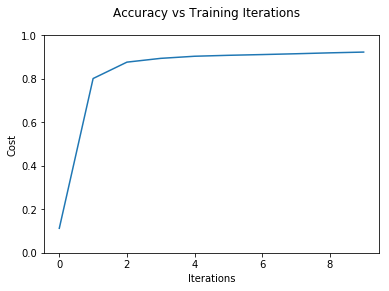

In [12]:
#Display Accuracy Plot
plt.plot(np.arange(0,10,1), testAccList)
plt.suptitle('Accuracy vs Training Iterations')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.ylim((0,1))
plt.show()

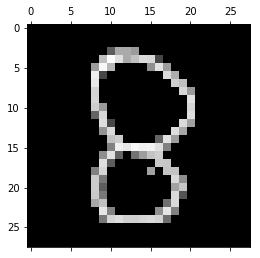

In [89]:
from PIL import Image
im = Image.open("userImage2.png")
#im.show()
digitArray = np.asarray(list(im.getdata()))
userDigit = []
for i in range(len(digitArray)):
    pixel = digitArray[i]
    #print(pixel)
    pixelBrightness = pixel[0]*0.299 + pixel[1]*0.587 + pixel[2]*0.114
    pixelBrightness = (-(pixelBrightness) + 255)
    userDigit.append(pixelBrightness)
maxVal = np.max(userDigit)
userDigit = userDigit/maxVal
userDigit = np.reshape(userDigit, (-1, 1))
userDigit = np.power(userDigit, .25)
displayUserDigit = np.reshape(userDigit, (-1, 28)) #Reshape data to 28 by 28 array instead of 784 by 1 array

plt.matshow(displayUserDigit, fignum=10,cmap=plt.cm.gray) #Make grayscale representation of digit
plt.show() #Show grayscale representation of digit

In [16]:
def blur(input_image):
    input_shape = input_image.shape
    output_image = np.zeros(input_shape) + input_image
    n_row = input_image.shape[0]
    n_col = input_image.shape[1]
    
    for i in range(n_row):
        for j in range(n_col):
            pixelVal = input_image[i,j]
            pixel_add = pixelVal * 1
            
            if i >0:
                pixel_top = (i-1, j)
                output_image[i-1,j] += pixel_add
            if i < n_row-1:
                pixel_bot = (i+1, j)
                output_image[i+1,j] += pixel_add
            if j > 0 :
                pixel_left = (i, j-1)
                output_image[i,j-1] += pixel_add
            if j < n_col -1:
                pixel_right = (i,j+1)
                output_image[i,j+1] += pixel_add
    return output_image / np.max(output_image)

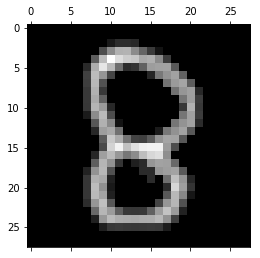

In [96]:
processedImage = blur(displayUserDigit)
#processedImage = blur(processedImage)
plt.matshow(processedImage, cmap=plt.cm.gray) #Make grayscale representation of digit
plt.show() #Show grayscale representation of digit
testImage = np.reshape(processedImage, ( 784,1)) 
testImage = np.power(testImage, .75)

In [91]:
#Forward Propagation
z_1 = np.dot(layer1_w,testImage)+layer1_b
a_1 = sigmoid(z_1)
z_2 = np.dot(layer2_w,a_1)+layer2_b
a_2 = sigmoid(z_2)

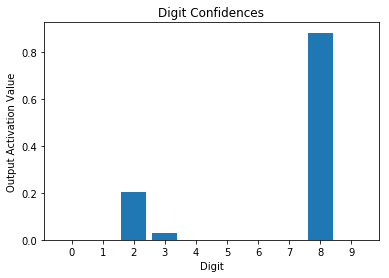

In [94]:
x = ['0','1','2','3','4','5','6','7','8','9']
plt.bar(x,a_2[:,0])
plt.title('Digit Confidences')
plt.ylabel('Output Activation Value')
plt.xlabel('Digit')
plt.show()